# Imports

In [1]:
from fastai.vision.all import *
import pathlib
import os

Ensuring the correctness of the path.

In [2]:
path = Path('/kaggle/input/birds-vs-drone-dataset/BirdVsDrone')

# Load and Prepare the Dataset # 

We use ImageDataLoaders.from_folder to load images from the dataset directory.

* It automatically labels images based on folder names (Birds, Drones)

* Splits 20% of the data for validation

* Resizes images to 224×224

* Applies basic data augmentations during training for better generalization

In [3]:
dls = ImageDataLoaders.from_folder(
    path,
    train='.',
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)

# Visualize a Batch of Images
Display a sample batch of training images with their corresponding labels to verify that the data is loaded and labeled correctly.



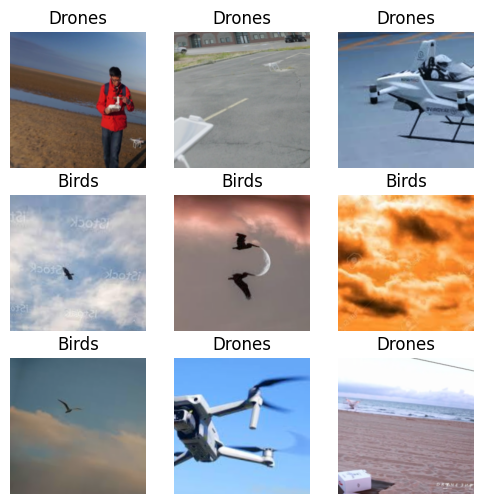

In [4]:
dls.show_batch(max_n=9, figsize=(6,6))

# Train the Model with Transfer Learning
We use a pretrained ResNet34 model and fine-tune it for our classification task.
The model first trains the final layers, then unfreezes and fine-tunes all layers for 3 epochs.

In [5]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 207MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.793848,0.159671,0.933333,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.263423,0.137887,0.957576,00:06
1,0.209637,0.070637,0.975758,00:05
2,0.154094,0.076006,0.987879,00:06


# Confusion Matrix

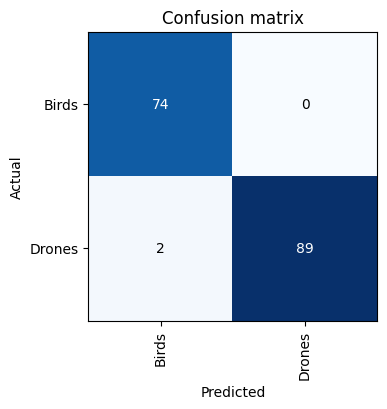

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4))

# Top Losses

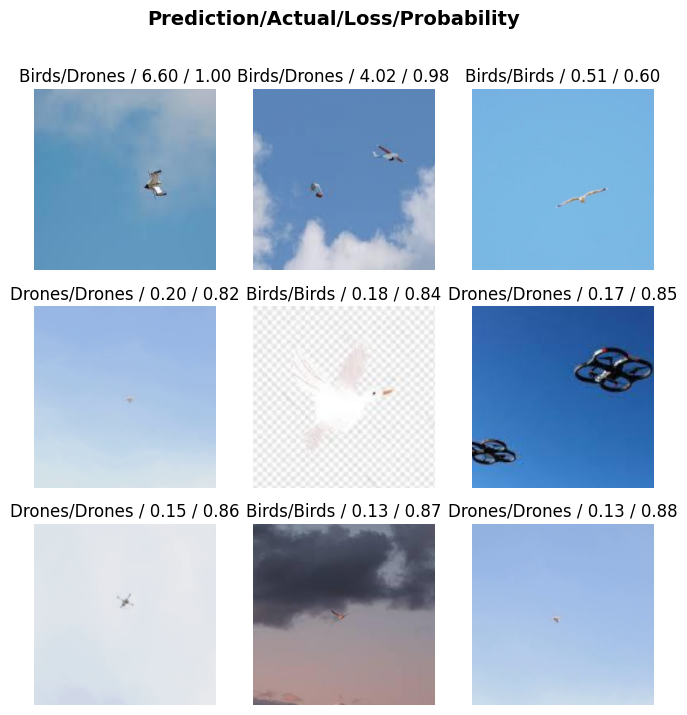

In [7]:
interp.plot_top_losses(9, figsize=(8,8))

# Exporting the Model

In [8]:
learn.export('/kaggle/working/bird_vs_drone_model.pkl')